# **Photo Response Non-Uniformity (PRNU)** - An Overview

**What is it?:**
* a scant residual introduced by the sensor of the camera of your devices
* unique
* sensible to spatial transformations


**Where is it used?**
* Device Identification
* Tampering Detection

**Main Problems:**
* Spatial Transformations (i.e. crop, up-scaling, down-scaling, radial corrections, and many others) desynchronize the PRNU and make it unreliable
* JPEG compressions reduce its reliablity

## How do you extract the PRNU?

- Wavelet Denoiser NoiseExtractFromImage()
- Zero Mean by Row and Columns
- Wiener Filter in DFT


[info and papers about PRNU](http://dde.binghamton.edu/download/camera_fingerprint/)

In [1]:
import os
os.chdir('CameraFingerprint')

## Example1 Device Identification
Match between Camera Fingerprint and PRNU of the Image

PCE: 201.93132265251
pvalue: 3.956889656162764e-46
PeakLocation: [0, 0]
peakheight: 0.016602954408741412
P_FA: 3.9568896561628765e-46
log10P_FA: -45.40264606052188


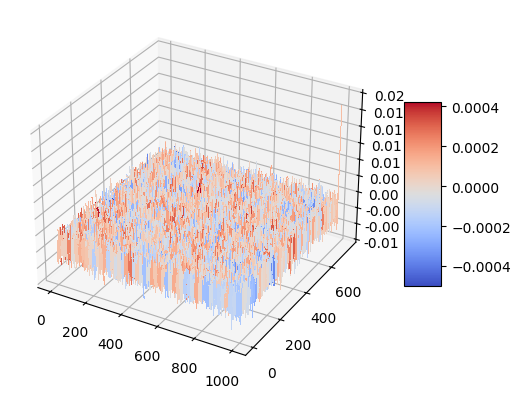

In [2]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv


# composing the Fingerprint from the images of Camera A
im1 = 'Images'+os.sep+'P1.jpg'
im2 = 'Images'+os.sep+'P2.jpg'
im3 = 'Images'+os.sep+'P3.jpg'
Images = [im1, im2, im3]

RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

#extracting the PRNU from another image of Camera A
imx = 'Images'+os.sep+'Pxxx.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))

# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)

#compute the peak of correlation energy PCE (the measure of similarity between Noisex and Fingerprint)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

##**Example2 Device Identification**##
 **[mis-Match between Camera Fingerprint and PRNU of the Image]**

In [3]:
if not os.path.exists('im_H0.jpg'):
  !wget -O im_H0.jpg "https://drive.google.com/uc?export=download&id=1tpiLPOVvKiBKYo6wfkoXCa89Vye9u6dO"

PCE: -5.595831301551525
pvalue: 0.990998367061598
PeakLocation: [0, 0]
peakheight: -0.0028178608827352245
P_FA: 0.990998367061598
log10P_FA: -0.0039270611320016986


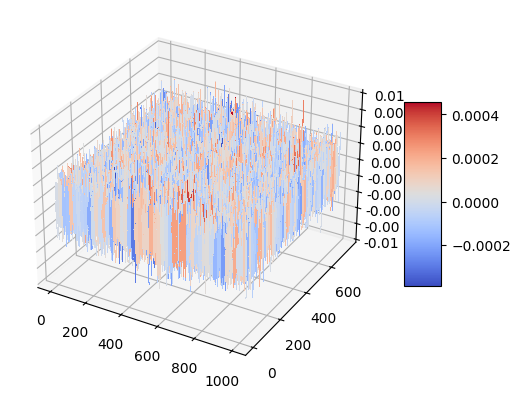

In [4]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv


# composing the Fingerprint from the images of Camera A
im1 = 'Images'+os.sep+'P1.jpg'
im2 = 'Images'+os.sep+'P2.jpg'
im3 = 'Images'+os.sep+'P3.jpg'
Images = [im1, im2, im3]

RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)

#extract the PRNU from an image of Camera B (i.e. Camera A and Camera B are NOT the same device)
imx = 'im_H0.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))

# The optimal detector (see publication "Large Scale Test of Sensor Fingerprint Camera Identification")
Ix = cv.cvtColor(cv.imread(imx),# image in BGR format
                 cv.COLOR_BGR2GRAY)

#compute the peak of correlation energy PCE (the measure of similarity between Noisex and Fingerprint)
C = Fu.crosscorr(Noisex,np.multiply(Ix, Fingerprint))
det, det0 = md.PCE(C)
for key in det.keys(): print("{0}: {1}".format(key, det[key]))
eu.mesh(C)

## **Example3: Tampering Detection**

In [5]:
%pip install gdown

You should consider upgrading via the '/home/amontibeller/Documents/03_DIDATTICA/SIV/LAB3/Lab3/LAB3_off/myenv_lab3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
#import test image
if not os.path.exists('IMG_0047.jpg'):
  !wget -O IMG_0047.jpg "https://drive.google.com/uc?export=download&id=1HTD86ybdjfBvg7AOyxaQfxyB1YphU5Uk"
#import camera fingerprint
if not os.path.exists('Fingerprint_CanonEOS1200d.dat'):
  !gdown https://drive.google.com/uc?id=1MuWQK1Ejk0QMTrvbKFkCPIrM2PvXeN5i


Downloading...
From (uriginal): https://drive.google.com/uc?id=1MuWQK1Ejk0QMTrvbKFkCPIrM2PvXeN5i
From (redirected): https://drive.google.com/uc?id=1MuWQK1Ejk0QMTrvbKFkCPIrM2PvXeN5i&confirm=t&uuid=957e9a12-01e1-46de-ac89-a19978c77bd3
To: /home/amontibeller/Documents/03_DIDATTICA/SIV/LAB3/Lab3/LAB3_off/CameraFingerprint/Fingerprint_CanonEOS1200d.dat
100%|████████████████████████████████████████| 287M/287M [00:03<00:00, 80.0MB/s]


SIZE CAMERA FINGERPRINT:  (3456, 5184)
SIZE PRNU IMAGE:  (3456, 5184)
Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!


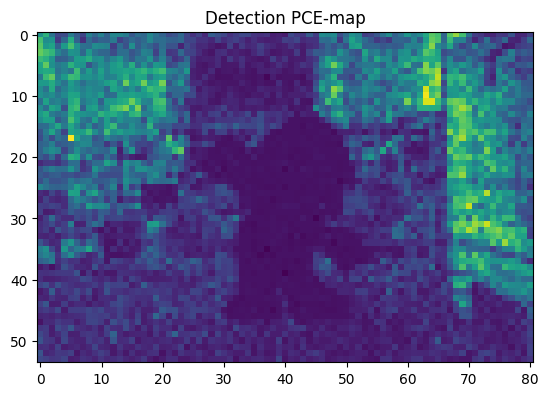

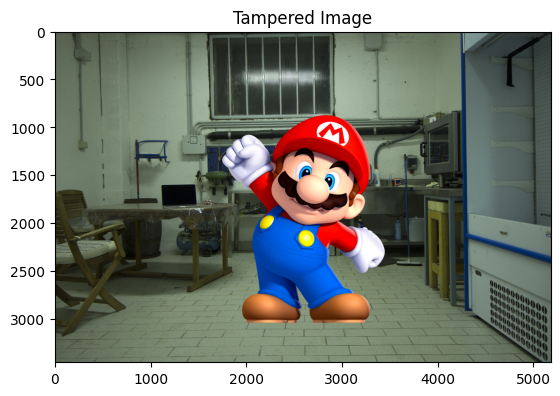

In [7]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv
import matplotlib.image as mpimg

#read camera fingerprint
Fingerprint = np.genfromtxt('Fingerprint_CanonEOS1200d.dat')
print('SIZE CAMERA FINGERPRINT: ', np.shape(Fingerprint))

imx = 'IMG_0047.jpg'
img = mpimg.imread(imx)
#extract PRNU from  an image presumely taken with the same camera of Fingerprint
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
print('SIZE PRNU IMAGE: ', np.shape(Noisex))

if np.shape(Noisex)==np.shape(Fingerprint):
  print('Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!')
  shift_range = [0, 0]
else:
  print('Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!')
  Noisex1 =  np.zeros_like(Fingerprint)
  Noisex1[:Noisex.shape[0], :Noisex.shape[1]] = Noisex
  Noisex = Noisex1

#divide image and fingerprint by blocks and compute the PCE of each block
blocks_x = np.arange(0,Noisex.shape[0], 64)
blocks_y = np.arange(0,Noisex.shape[1], 64)
PCE_map =np.zeros((len(blocks_x), len(blocks_y)))
for y in range(0,len(blocks_y)):
  for x in range(0,len(blocks_x)):
    block_Noisex = Noisex[blocks_x[x]:blocks_x[x]+64, blocks_y[y]:blocks_y[y]+64]
    block_Fingerprint = Fingerprint[blocks_x[x]:blocks_x[x]+64, blocks_y[y]:blocks_y[y]+64]
    C = Fu.crosscorr(block_Noisex,block_Fingerprint)
    det, det0 = md.PCE(C)
    PCE_map[x,y] = det['PCE']
import matplotlib.pyplot as plt
plt.imshow(PCE_map)
plt.title('Detection PCE-map')
plt.show()
plt.imshow(img)
plt.title('Tampered Image')
plt.show()

## **The spatial transformation's problem**
Example: Radial Correction

In [8]:
import os
#import test image
if not os.path.exists('im5.jpg'):
  !wget -O im5.jpg "https://drive.google.com/uc?export=download&id=1Q9lDMcG0-sps-GLw2NuSgaa_CeLuKGv2"
#import camera fingerprint
if not os.path.exists('FINGERPRINT_CanonSX230HS_focal70.dat'):
  !wget -O FINGERPRINT_CanonSX230HS_focal70.dat "https://drive.google.com/uc?export=download&id=1xJnSw-lSouswj5EpDzkWR2oGJDfOuhEe"


--2023-11-16 11:06:58--  https://drive.google.com/uc?export=download&id=1xJnSw-lSouswj5EpDzkWR2oGJDfOuhEe


Resolving drive.google.com (drive.google.com)... 216.58.204.142, 2a00:1450:4002:402::200e
Connecting to drive.google.com (drive.google.com)|216.58.204.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b2dh3rvggfmskvrbjg7bg9u7l5qgtahp/1700129175000/02038337912464628386/*/1xJnSw-lSouswj5EpDzkWR2oGJDfOuhEe?e=download&uuid=43e4e87e-81dd-49ae-b540-b4fca41f5e03 [following]
--2023-11-16 11:07:04--  https://doc-0k-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b2dh3rvggfmskvrbjg7bg9u7l5qgtahp/1700129175000/02038337912464628386/*/1xJnSw-lSouswj5EpDzkWR2oGJDfOuhEe?e=download&uuid=43e4e87e-81dd-49ae-b540-b4fca41f5e03
Resolving doc-0k-78-docs.googleusercontent.com (doc-0k-78-docs.googleusercontent.com)... 216.58.204.129, 2a00:1450:4002:809::2001
Connecting to doc-0k-78-docs.googleusercontent.com (doc-0k-78-docs.googleusercontent.com)|216.58.

SIZE CAMERA FINGERPRINT:  (1584, 2816)
SIZE PRNU IMAGE:  (1584, 2816)
Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!
PCE: 18.514455464376258
PeakLocation: [0, 0]


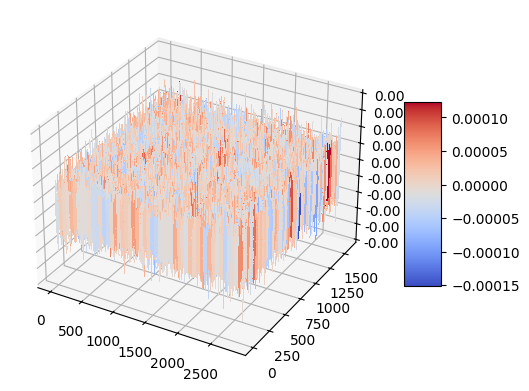

In [9]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv

#read camera fingerprint
Fingerprint = np.genfromtxt('FINGERPRINT_CanonSX230HS_focal70.dat')
print('SIZE CAMERA FINGERPRINT: ', np.shape(Fingerprint))

#extract PRNU from image taken with the same camera of Fingerprint
imx = 'im5.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
print('SIZE PRNU IMAGE: ', np.shape(Noisex))

if np.shape(Noisex)==np.shape(Fingerprint):
  print('Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!')
  shift_range = [0, 0]
  C = Fu.crosscorr(Noisex,Fingerprint)
else:
  print('Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!')
  Noisex1 =  np.zeros_like(Fingerprint)
  Noisex1[:Noisex.shape[0], :Noisex.shape[1]] = Noisex
  shift_range = [Fingerprint.shape[0]-Noisex.shape[0], Fingerprint.shape[1]-Noisex.shape[1]]
  C = Fu.crosscorr(Noisex1,Fingerprint)

#compute the peak of correlation energy PCE (the measure of similarity between Noisex and Fingerprint)
det, det0 = md.PCE(C, shift_range=shift_range)
print("{0}: {1}".format('PCE', det['PCE']))
print("{0}: {1}".format('PeakLocation', det['PeakLocation']))
eu.mesh(C)

Example: Down-scaling

In [10]:
import os
#import test image
if not os.path.exists('im_downscale.jpg'):
  !wget -O im_downscale.jpg "https://drive.google.com/uc?export=download&id=1kmPotOdLBSZGKPPFHmVjaXuyRWxQVvLS"
#import camera fingerprint
if not os.path.exists('FINGERPRINT_D01.dat'):
  !wget -O FINGERPRINT_D01.dat "https://drive.google.com/uc?export=download&id=1DmNH1hLzsQ_rFcF2DB7VvNHiaZhoy7HH"

--2023-11-16 11:07:14--  https://drive.google.com/uc?export=download&id=1DmNH1hLzsQ_rFcF2DB7VvNHiaZhoy7HH
Resolving drive.google.com (drive.google.com)... 216.58.204.142, 2a00:1450:4002:402::200e
Connecting to drive.google.com (drive.google.com)|216.58.204.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b7o2lrcm4o3hcque0a3uo5j9fb29qbjd/1700129175000/02038337912464628386/*/1DmNH1hLzsQ_rFcF2DB7VvNHiaZhoy7HH?e=download&uuid=faa96f72-c212-452d-b709-db4e12d4ae1d [following]
--2023-11-16 11:07:18--  https://doc-14-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b7o2lrcm4o3hcque0a3uo5j9fb29qbjd/1700129175000/02038337912464628386/*/1DmNH1hLzsQ_rFcF2DB7VvNHiaZhoy7HH?e=download&uuid=faa96f72-c212-452d-b709-db4e12d4ae1d
Resolving doc-14-78-docs.googleusercontent.com (doc-14-78-docs.googleusercontent.com)... 216.58.204.129, 2a00:1450:4002:8

SIZE CAMERA FINGERPRINT:  (1920, 2560)
SIZE PRNU IMAGE:  (720, 1280)
Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!
PCE: 21.182850693517196
PeakLocation: [1137, 640]


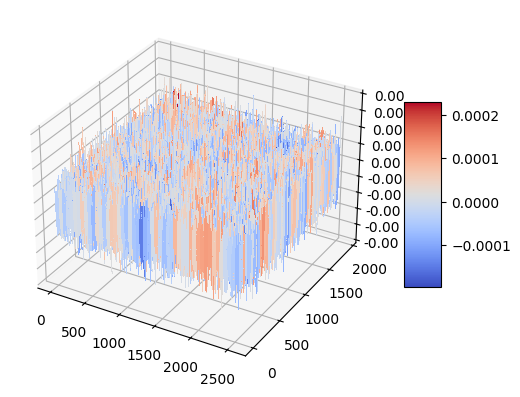

In [11]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv

#read camera fingerprint
Fingerprint = np.genfromtxt('FINGERPRINT_D01.dat')
print('SIZE CAMERA FINGERPRINT: ', np.shape(Fingerprint))

#extract PRNU from image taken with the same camera of Fingerprint
imx = 'im_downscale.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
print('SIZE PRNU IMAGE: ', np.shape(Noisex))

if np.shape(Noisex)==np.shape(Fingerprint):
  print('Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!')
  shift_range = [0, 0]
  C = Fu.crosscorr(Noisex1,Fingerprint)
else:
  print('Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!')
  Noisex1 =  np.zeros_like(Fingerprint)
  Noisex1[:Noisex.shape[0], :Noisex.shape[1]] = Noisex
  shift_range = [Fingerprint.shape[0]-Noisex.shape[0], Fingerprint.shape[1]-Noisex.shape[1]]
  C = Fu.crosscorr(Noisex1,Fingerprint)

det, det0 = md.PCE(C, shift_range=shift_range)
#for key in det.keys(): print("{0}: {1}".format(key, det[key]))
print("{0}: {1}".format('PCE', det['PCE']))
print("{0}: {1}".format('PeakLocation', det['PeakLocation']))
eu.mesh(C)


## **Exercise 1**
Determine which image was taken with the same device of the images used to compose the camera fingerprint.

**TIP**: There's only one image and it has the highest PCE value.

In [12]:
import os
#import test image
if not os.path.exists('im1.jpg'):
  !wget -O im1.jpg "https://drive.google.com/uc?export=download&id=1V3uJT-m2uPXlxlQuGRY6Z5CJzNl89Sgp"
#import test image
if not os.path.exists('im2.jpg'):
  !wget -O im2.jpg "https://drive.google.com/uc?export=download&id=1JYaAlb4lg2cYq8RSJhnyKg0YNixBhGLg"
#import test image
if not os.path.exists('im3.jpg'):
  !wget -O im3.jpg "https://drive.google.com/uc?export=download&id=1SMcJr3hwiBL2Z8oA_ougneBtlYE-4lv_"
#import test image
if not os.path.exists('im4.jpg'):
  !wget -O im4.jpg "https://drive.google.com/uc?export=download&id=1OcvvchD6iXKG5NulA8RxR61S8J9k9GwU"

In [13]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv


# extracting Fingerprint from same size images in a path
im1 = 'Images'+os.sep+'P1.jpg'
im2 = 'Images'+os.sep+'P2.jpg'
im3 = 'Images'+os.sep+'P3.jpg'
Images = [im1, im2, im3]

RP,_,_ = gF.getFingerprint(Images)
RP = Fu.rgb2gray1(RP)
sigmaRP = np.std(RP)
Fingerprint = Fu.WienerInDFT(RP, sigmaRP)
#import images and extract their PRNU
imx = ['im1.jpg', 'im2.jpg', 'im3.jpg', 'im4.jpg']
'''
YOUR CODE
'''
#COMPUTE AND PRINT ONE BY ONE THE PCE VALUES TO DETECT THE IMAGE TAKEN WITH THE
#SAME CAMERA OF FINGERPRINT
'''
YOUR CODE
'''

'\nYOUR CODE\n'

## **Exercise 2**

Find the parameter able to reverse the **down-scaling** spatial transformation and maximize the final PCE value (~70 is the goal). 


In [14]:
import os
#import test image
if not os.path.exists('frame.png'):
  !wget -O frame.png "https://drive.google.com/uc?export=download&id=1ZKxSK3VKMJCKtgEmSjG4XXBeaFNRqCLe"


In [15]:
%pip install scikit-image

You should consider upgrading via the '/home/amontibeller/Documents/03_DIDATTICA/SIV/LAB3/Lab3/LAB3_off/myenv_lab3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv
from skimage.transform import rescale


#read camera fingerprint
Fingerprint = np.genfromtxt('FINGERPRINT_D01.dat')
print('SIZE CAMERA FINGERPRINT: ', np.shape(Fingerprint))

#extract PRNU from image
imx = 'frame.png'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
print('SIZE PRNU IMAGE: ', np.shape(Noisex))

if np.shape(Noisex)==np.shape(Fingerprint):
  print('Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!')
  shift_range = [0, 0]
  C = Fu.crosscorr(Noisex1,Fingerprint)
else:
  print('Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!')
  Noisex1 =  np.zeros_like(Fingerprint)
  Noisex1[:Noisex.shape[0], :Noisex.shape[1]] = Noisex
  shift_range = [Fingerprint.shape[0]-Noisex.shape[0], Fingerprint.shape[1]-Noisex.shape[1]]
  C = Fu.crosscorr(Noisex1,Fingerprint)

det, det0 = md.PCE(C, shift_range=shift_range)
print('PCE value before down-scaling inversion (i.e. upscaling)')
print("{0}: {1}".format('PCE', det['PCE']))

k = 0
while k >= 0.49999:
  #rescale your image
  Noisex_up = rescale(Noisex, 1/k)
  '''
  YOUR CODE
  '''
  k+=0.01

SIZE CAMERA FINGERPRINT:  (1920, 2560)
SIZE PRNU IMAGE:  (720, 1280)
Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!
PCE value before down-scaling inversion (i.e. upscaling)
PCE: 26.484812868653115


**Possibily there's a smarter way to find k (in one shot)! Can you guess it?** 

TIP: the camera fingerprint is composed with images, instead the PRNU is extracted from a video frame taken with the same device of the camera fingerprint. 

If you find the solution, **let us know** :-)

## **Exercise 3**
Find the parameters able to reverse the **radial correction** spatial transformation applied to the test image. GOAL: PCE ~250 


Useful functions to reverse the radial correction :-)

In [33]:
from scipy.interpolate import interp1d
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from scipy.ndimage import map_coordinates




def radial_coordinates(M, N):
    center = [round(N / 2), round(M / 2)]
    
    # Creates N x M (#pixels) x-y points
    xi, yi = np.meshgrid(np.arange(0, N), np.arange(0, M))
    
    # Converts the mesh into a column vector of coordinates relative to the center
    xt = xi.flatten(order='F') - center[0]
    yt = yi.flatten(order='F') - center[1]

    #xt1 = xi.flatten() - center[0]
    #yt1 = yi.flatten() - center[1]

    # Converts the x-y coordinates to polar coordinates
    #theta, r1 = np.arctan2(yt, xt), np.sqrt(xt1**2 + yt1**2) #np.arctan2(yt, xt), np.hypot(xt, yt)
    theta = np.arctan2(yi - center[1], xi - center[0])
    r1 = np.sqrt((xi-center[0])**2 + (yi-center[1])**2)
    # Calculate the maximum vector (image center to image corner) to be used for normalization
    R = np.sqrt(center[0] ** 2 + center[1] ** 2)
    # Normalize the polar coordinate r to range between 0 and 1
    r = r1 / R
    
    ut = np.full_like(r, np.nan)
    vt = np.full_like(r, np.nan)
    
    return r, theta, R, xi, yi, center, r1, xt, yt, ut, vt


def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)


def imdistcorrect(noise, k, ri, ro, r, theta, R, xi, yi, center, ut, vt, flag_rc):
    
    r_v = np.reshape(r, [center[0]*2*center[1]*2])
    theta1 =  np.reshape(theta, [center[0]*2*center[1]*2])

    index = np.where((r_v >= ri/R) & (r_v <= ro/R))

    s1 = np.full_like(r_v, np.nan)
    theta2 = np.full_like(theta1, np.nan)
    #breakpoint()
    s1[index[0]] = distortfun(r_v[index[0]], k, flag_rc)
    theta2[index[0]] = theta1[index[0]]
    s2 = s1 * R
    s3 = np.reshape(s2, xi.shape)
    theta3 = np.reshape(theta2, xi.shape)
    ut, vt = pol2cart(s3, theta3)
    ut += center[0]
    vt += center[1]

    tmap_B = np.stack((vt,ut),axis=0) #dstack((u, v))
    noise2 = map_coordinates(noise, tmap_B, order=1, mode='constant', cval=255)
    #noise2 = map_coordinates(noise, (v,u), order=1, mode='constant', cval=255)
    return noise2

# Nested function that picks the model type to be used
def distortfun(r, k, fcnum):
    if fcnum == 1:
        return r * (1 / (1 + k * r))
    elif fcnum == 2:
        return r * (1 / (1 + k * (r**2)))
    elif fcnum == 3:
        return r * (1 + k * r)
    elif fcnum == 4:
        return r * (1 + k * (r**2))
    elif fcnum == 5:
        return r * (1 - k * (r**2) + 3 * (k**2) * (r**4))
    elif fcnum == 6:
        return r * (1 + k)
    elif fcnum == 7:
        return r / (1 + k)

def crop_center(img,cropx,cropy):
    startx = 0
    starty = 0
    return img[starty:starty+cropy,startx:startx+cropx]

**YOUR CODE**

In [35]:
import src.Functions as Fu
import src.Filter as Ft
import src.getFingerprint as gF
import src.maindir as md
import src.extraUtils as eu
import numpy as np
import os
import cv2 as cv

#read camera fingerprint
Fingerprint = np.genfromtxt('FINGERPRINT_CanonSX230HS_focal70.dat')
print('SIZE CAMERA FINGERPRINT: ', np.shape(Fingerprint))

#extract PRNU from image
imx = 'im5.jpg'
Noisex = Ft.NoiseExtractFromImage(imx, sigma=2.)
Noisex = Fu.WienerInDFT(Noisex, np.std(Noisex))
print('SIZE PRNU IMAGE: ', np.shape(Noisex))

if np.shape(Noisex)==np.shape(Fingerprint):
  print('Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!')
  shift_range = [0, 0]
  C = Fu.crosscorr(Noisex,Fingerprint)
else:
  print('Camera Fingerprint and Image PRNU size are NOT the same. CASE: NOT perfectly aligned!')
  Noisex1 =  np.zeros_like(Fingerprint)
  Noisex1[:Noisex.shape[0], :Noisex.shape[1]] = Noisex
  shift_range = [Fingerprint.shape[0]-Noisex.shape[0], Fingerprint.shape[1]-Noisex.shape[1]]
  C = Fu.crosscorr(Noisex1,Fingerprint)
det, det0 = md.PCE(C, shift_range=shift_range)
print('PCE value before Radial Correction Inversion')
print("{0}: {1}".format('PCE', det['PCE']))
print("{0}: {1}".format('PeakLocation', det['PeakLocation']))

#compute image size
M, N = [Noisex.shape[1],Noisex.shape[0]]
M = np.asarray(M)
N = np.asarray(N)
#compute polar coordinate (r, theta), half image diagonal size (R),
#cartesian coordinates (xi, yi) andr1,   center coordinates
r, theta, R, xi, yi, center, r1, xt, yt, ut, vt = radial_coordinates(M, N)
#apply radial correction inversion with the following parameters
k = -0.22
while k < 0.23:
    Noisex_post = imdistcorrect(Noisex, k, 0, R, r, theta, R, xi, yi, center, ut, vt, flag_rc=5)
    #print(k)
    #find the correct k to invert the radial correctoin and maximize the PCE
    '''
    YOUR CODE
    '''
    k+=0.001

SIZE CAMERA FINGERPRINT:  (1584, 2816)
SIZE PRNU IMAGE:  (1584, 2816)
Camera Fingerprint and Image PRNU size are the same. CASE: Perfectly aligned!
PCE value before Radial Correction Inversion
PCE: 18.514455464376258
PeakLocation: [0, 0]
-0.22
-0.16999999999999998
-0.11999999999999998
-0.06999999999999998
-0.019999999999999976
0.030000000000000027
0.08000000000000003
0.13000000000000003
0.18000000000000005
